## Home task: Tensorflow & Keras

1) Classify the signs (fingers)  dataset

2) Try to change the number of hidden layers

3) Change the activation to tanh or sigmoid and see what happens

4) Change the dropout ratio and check the performance

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
def display_samples_in_grid(X, n_rows, n_cols=None, y=None):
    if n_cols is None:
        n_cols = n_rows

    indices = np.random.randint(0, len(X), n_rows * n_cols)
    for i in range(n_rows):
        for j in range(n_cols):
            index = n_cols * i + j
            ax = plt.subplot(n_rows, n_cols, index + 1)
            ax.imshow(X[indices[index]], cmap='Greys')
            if not (y is None):
                plt.title(y[indices[index]].squeeze())
            plt.axis('off')

In [5]:
import os
import h5py

def load_dataset():
    filename = os.path.join('data', 'train_signs.h5')
    train_dataset = h5py.File(filename, 'r')
    X_train = np.array(train_dataset['train_set_x'][:])  # Your train set features
    Y_train = np.array(train_dataset['train_set_y'][:])  # Your train set labels

    filename = os.path.join('data', 'test_signs.h5')
    test_dataset = h5py.File(filename, 'r')
    X_test = np.array(test_dataset['test_set_x'][:])  # Your test set features
    Y_test = np.array(test_dataset['test_set_y'][:])  # Your test set labels

    classes = np.array(test_dataset['list_classes'][:])  # List of classes

    Y_train = Y_train.reshape((1, Y_train.shape[0]))
    Y_test = Y_test.reshape((1, Y_test.shape[0]))

    return X_train, Y_train, X_test, Y_test, classes


# Read the finger signs dataset
train_data, train_labels, test_data, test_labels, classes = load_dataset()

print('train_data.shape =', train_data.shape)
print('train_labels.shape =', train_labels.shape)
print('test_data.shape =', test_data.shape)
print('test_labels.shape =', test_labels.shape)

train_data.shape = (1080, 64, 64, 3)
train_labels.shape = (1, 1080)
test_data.shape = (120, 64, 64, 3)
test_labels.shape = (1, 120)


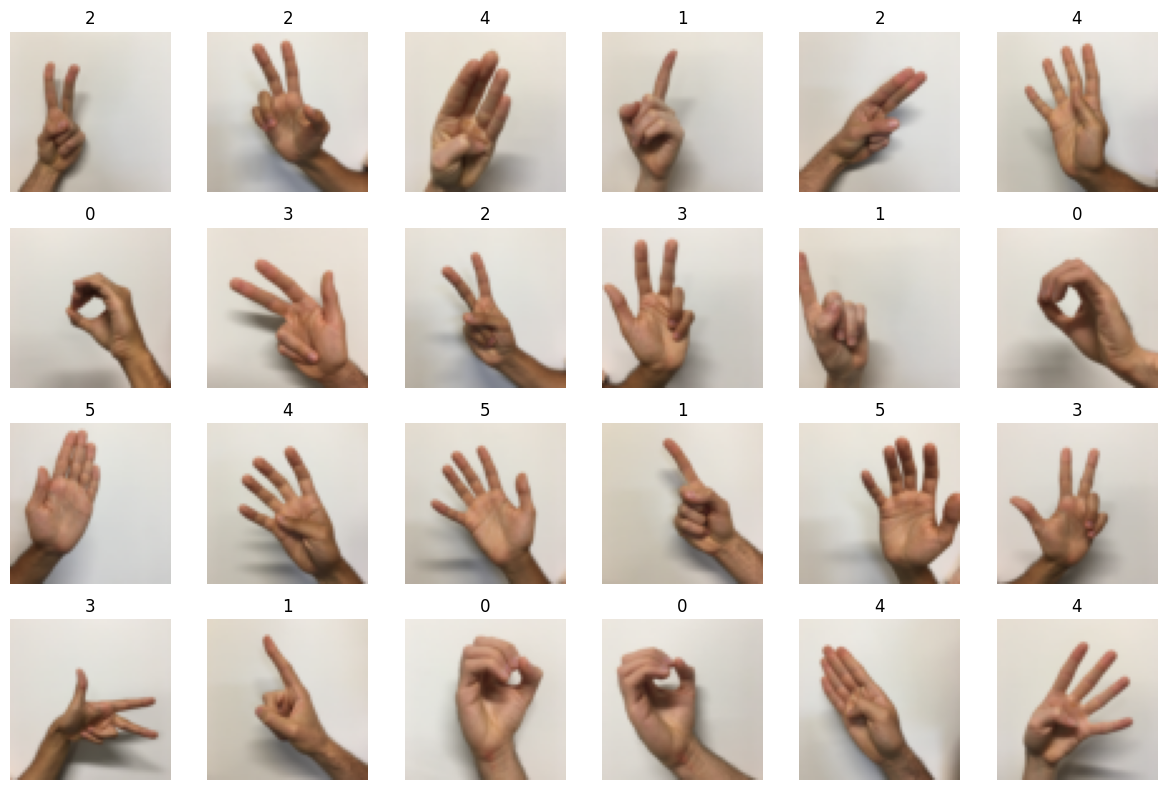

In [6]:
# Shows the sample from the dataset
plt.figure(figsize=(12, 8))
display_samples_in_grid(train_data, n_rows=4, n_cols=6, y=train_labels.T)
plt.tight_layout(h_pad=1, w_pad=1)

In [7]:
BATCH_SIZE = 16
EPOCHS = 20

# Number of possible signs: 0 to 5
num_classes = len(classes)

# Shape of each image
img_shape = train_data.shape[1:]

# Normalize image data to each pixel value be in range from 0 to 1
x_train = train_data / 255
x_test = test_data / 255

# Convert labels to one-hot representation
y_train = tf.keras.utils.to_categorical(np.squeeze(train_labels))
y_test = tf.keras.utils.to_categorical(np.squeeze(test_labels))

print('num_classes =', num_classes)
print('img_shape =', img_shape)
print('y_train.shape =', y_train.shape)
print('y_test.shape =', y_test.shape)

num_classes = 6
img_shape = (64, 64, 3)
y_train.shape = (1080, 6)
y_test.shape = (120, 6)


In [8]:
def display_curves(history):

    # Two plots are shown in one row
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    # Show loss curves in the left plot
    ax1.set_title('Loss curves')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.plot(history['loss'], color='b', marker='.', label='Training loss')
    ax1.plot(history['val_loss'], color='g', marker='.', label='Validation loss')
    ax1.legend()

    # Show accuracy curves in the right plot
    ax2.set_title('Accuracy curves')
    ax2.set_ylabel('Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.plot(history['accuracy'], color='b', marker='.', label='Training accuracy')
    ax2.plot(history['val_accuracy'], color='g', marker='.', label='Validation accuracy')
    ax2.legend()

#### Classify the signs (fingers)  dataset

Epoch 1/20
68/68 [==============================] - 3s 8ms/step - loss: 14.9217 - accuracy: 0.1889 - val_loss: 9.9545 - val_accuracy: 0.1667
Epoch 2/20
68/68 [==============================] - 0s 4ms/step - loss: 7.0633 - accuracy: 0.1889 - val_loss: 5.6106 - val_accuracy: 0.1667
Epoch 3/20
68/68 [==============================] - 0s 5ms/step - loss: 4.3689 - accuracy: 0.2194 - val_loss: 2.6988 - val_accuracy: 0.2250
Epoch 4/20
68/68 [==============================] - 0s 5ms/step - loss: 2.8263 - accuracy: 0.2259 - val_loss: 2.3681 - val_accuracy: 0.2417
Epoch 5/20
68/68 [==============================] - 0s 4ms/step - loss: 2.2173 - accuracy: 0.2546 - val_loss: 2.0889 - val_accuracy: 0.2083
Epoch 6/20
68/68 [==============================] - 0s 5ms/step - loss: 1.8157 - accuracy: 0.2685 - val_loss: 2.3336 - val_accuracy: 0.1667
Epoch 7/20
68/68 [==============================] - 0s 6ms/step - loss: 1.6685 - accuracy: 0.3241 - val_loss: 1.6365 - val_accuracy: 0.3417
Epoch 8/20
68/68 [=

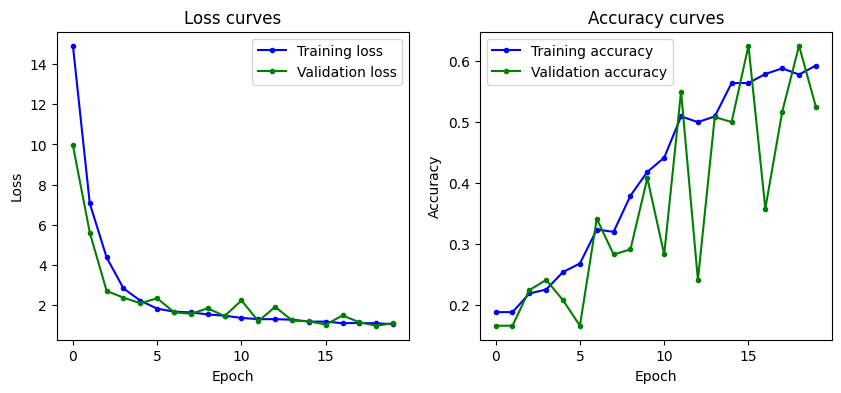

In [9]:
# Build the neural network model with the input flatten layer,
# single hidden layer (512 unit) and the output layer for the class assigning 
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=img_shape),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Use RMSProp as optimizer and categorical cross entropy as loss function
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the neural network for 20 epochs and display the results: loss and accuracy curves for training and validation data
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_test, y_test))
display_curves(history.history);

In [10]:
# Test the model (result is the same as on the validation data in the last epoch)
model.evaluate(x_test, y_test);

4/4 [==============================] - 0s 7ms/step - loss: 1.0952 - accuracy: 0.5250


#### Change the number of hidden layer

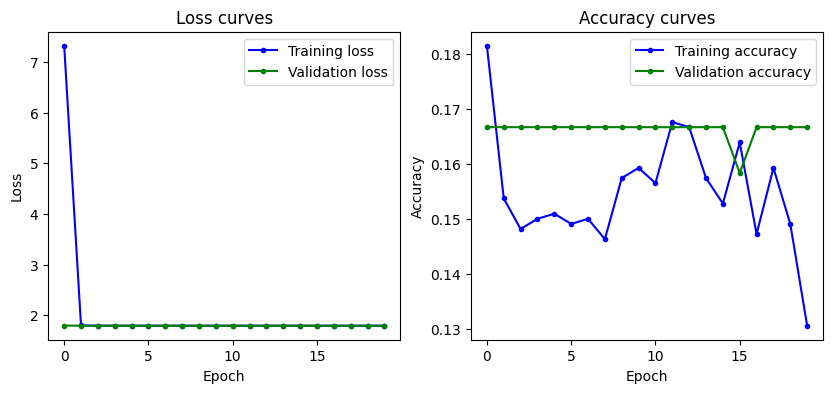

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=img_shape),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),  # Add another hidden layer with 512 units
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_test, y_test), verbose=0)
display_curves(history.history);

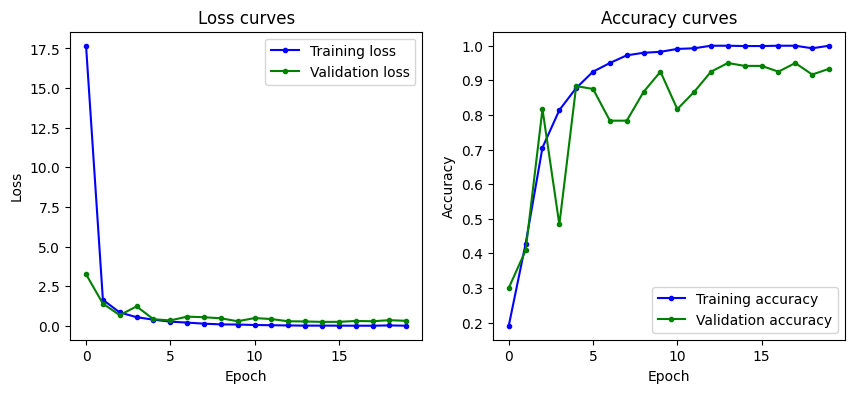

In [12]:
model = tf.keras.models.Sequential([
    
    # Add cnvolution layer with 16 filters and a 2x2 kernel
    tf.keras.layers.Conv2D(16, (2, 2), activation='relu', input_shape=img_shape),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_test, y_test), verbose=0)
display_curves(history.history);

#### Change the activation to `tanh` or `sigmoid`

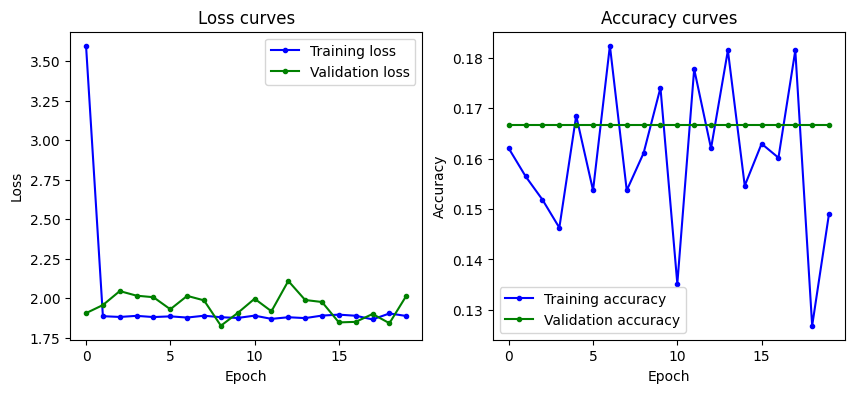

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (2, 2), activation='relu', input_shape=img_shape),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='tanh'),  # Change the activation function to tanh in the hidden layer
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_test, y_test), verbose=0)
display_curves(history.history);

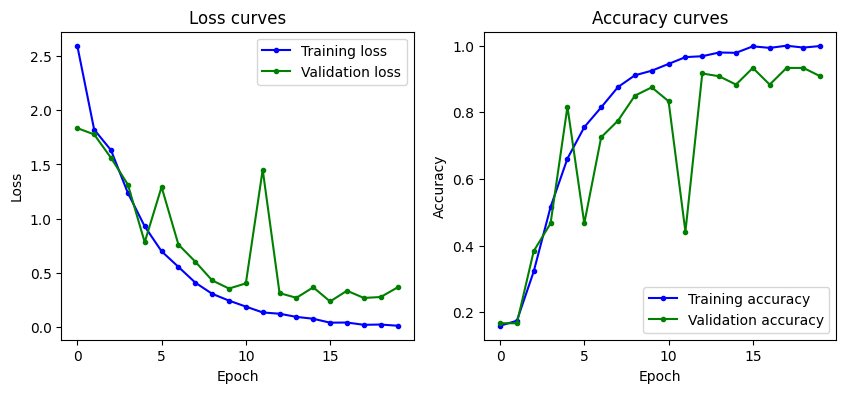

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (2, 2), activation='relu', input_shape=img_shape),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='sigmoid'),  # Change the activation function to sigmoid in the hidden layer
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_test, y_test), verbose=0)
display_curves(history.history);

#### Change the dropout ratio

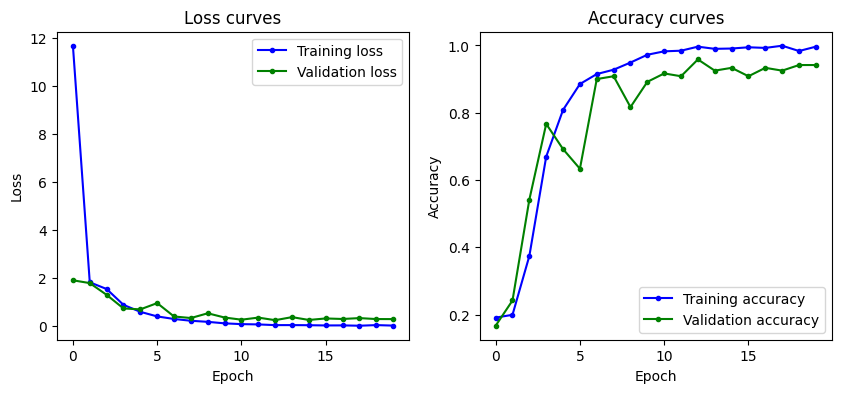

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (2, 2), activation='relu', input_shape=img_shape),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Add 0.2 dropout on the hidden layer
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_test, y_test), verbose=0)
display_curves(history.history);

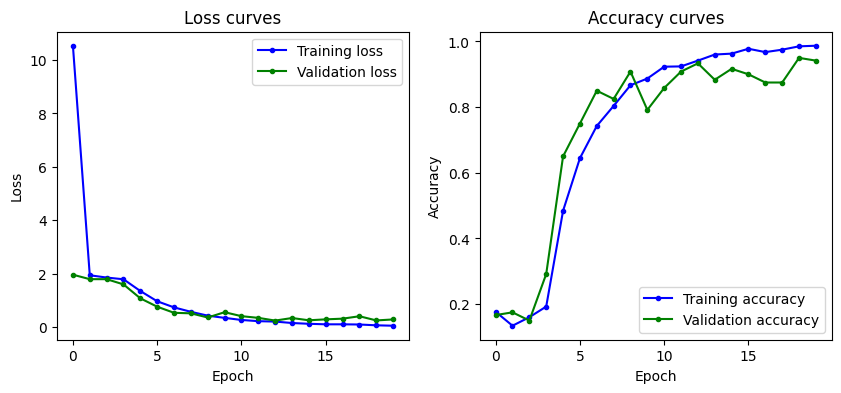

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (2, 2), activation='relu', input_shape=img_shape),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Change the dropout ratio to 0.5
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_test, y_test), verbose=0)
display_curves(history.history);